In [80]:
#Deep Learning Project

In [62]:
#Importing Required Libraries and Packages

import torch
import sklearn
import numpy as np
import pandas
from sklearn.metrics import accuracy_score, classification_report
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn

In [63]:
#Checking GPU

torch.cuda.is_available()

True

In [64]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [73]:
#Transforming data from Images to Tensor

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485,0.456,0.406],std = [0.229,0.224,0.225])])

In [ ]:
#Loading Data

trainset = torchvision.datasets.CIFAR10(root = './data',train = True,download = True,transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 128,shuffle = True)

In [ ]:
#Loading Pre Trained Model
resnet = models.resnet18(pretrained = True).to(device)
num_classes = 10

In [110]:
#Layer Freezing
for param in resnet.parameters():
    param.requires_grad = False

num_features=resnet.fc.in_features
resnet.fc = nn.Linear(num_features, num_classes).to(device)

In [111]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss().to(device)
optim = torch.optim.Adam(resnet.parameters(), lr=0.001)

In [112]:
#Fine Tuning 

for epoch in range(100):
    running_loss = 0.0    
    for inputs, labels in trainloader: 
        inputs, labels = inputs.to(device), labels.to(device) 
        optim.zero_grad()
        outputs = resnet(inputs).to(device)
        loss = criterion(outputs, labels).to(device)
        loss.backward()
        optim.step()
        running_loss += loss.item()
    print(f'Epoch: {epoch + 1} , loss: {running_loss/100:.3f}')
    running_loss = 0.0
    
print("Fine Tuning Complete")

Epoch: 1 , loss: 10.639
Epoch: 2 , loss: 9.861
Epoch: 3 , loss: 9.607
Epoch: 4 , loss: 9.434
Epoch: 5 , loss: 9.316
Epoch: 6 , loss: 9.196
Epoch: 7 , loss: 8.981
Epoch: 8 , loss: 9.000
Epoch: 9 , loss: 8.969
Epoch: 10 , loss: 8.841
Epoch: 11 , loss: 8.848
Epoch: 12 , loss: 8.733
Epoch: 13 , loss: 8.710
Epoch: 14 , loss: 8.663
Epoch: 15 , loss: 8.621
Epoch: 16 , loss: 8.541
Epoch: 17 , loss: 8.561
Epoch: 18 , loss: 8.473
Epoch: 19 , loss: 8.472
Epoch: 20 , loss: 8.405
Epoch: 21 , loss: 8.445
Epoch: 22 , loss: 8.360
Epoch: 23 , loss: 8.334
Epoch: 24 , loss: 8.285
Epoch: 25 , loss: 8.286
Epoch: 26 , loss: 8.292
Epoch: 27 , loss: 8.258
Epoch: 28 , loss: 8.249
Epoch: 29 , loss: 8.264
Epoch: 30 , loss: 8.203
Epoch: 31 , loss: 8.189
Epoch: 32 , loss: 8.166
Epoch: 33 , loss: 8.102
Epoch: 34 , loss: 8.067
Epoch: 35 , loss: 8.144
Epoch: 36 , loss: 8.029
Epoch: 37 , loss: 8.050
Epoch: 38 , loss: 8.087
Epoch: 39 , loss: 8.005
Epoch: 40 , loss: 7.987
Epoch: 41 , loss: 7.932
Epoch: 42 , loss: 7.954


In [167]:
torch.save({'model_state_dict':resnet.state_dict(),
            'optim_state_dict':optim.state_dict()},'fine_tuned_resnet.pth')

In [165]:
import PIL
import PIL.Image as Image
import cv2

In [142]:
model

OrderedDict([('conv1.weight',
              tensor([[[[-1.3693e-02, -1.7951e-02, -1.4091e-02,  ...,  3.8924e-02,
                         -6.2503e-04, -3.2809e-02],
                        [ 1.3771e-02,  2.5304e-03, -1.1745e-01,  ..., -2.8345e-01,
                         -1.4052e-01, -9.2967e-03],
                        [-1.1376e-03,  5.4948e-02,  2.9096e-01,  ...,  5.1061e-01,
                          2.4789e-01,  5.3982e-02],
                        ...,
                        [-2.2545e-02,  1.0641e-02,  6.6060e-02,  ..., -3.4227e-01,
                         -4.2924e-01, -2.6760e-01],
                        [ 3.9205e-02,  3.8988e-02,  6.0278e-02,  ...,  4.0965e-01,
                          3.8958e-01,  1.5946e-01],
                        [-5.9477e-03, -5.6871e-03, -2.6885e-02,  ..., -1.5476e-01,
                         -8.7448e-02, -1.0842e-02]],
              
                       [[-8.7747e-03, -2.9074e-02, -3.7211e-02,  ...,  2.6263e-02,
                         -7.9673

In [169]:
resnet = torch.load('fine_tuned_resnet.pth')

In [157]:
image = Image.open('plane.jpg')
image = image.transform
output = model(image)

TypeError: 'collections.OrderedDict' object is not callable

In [160]:
image = Image.open('plane.jpg')
image = image.transform

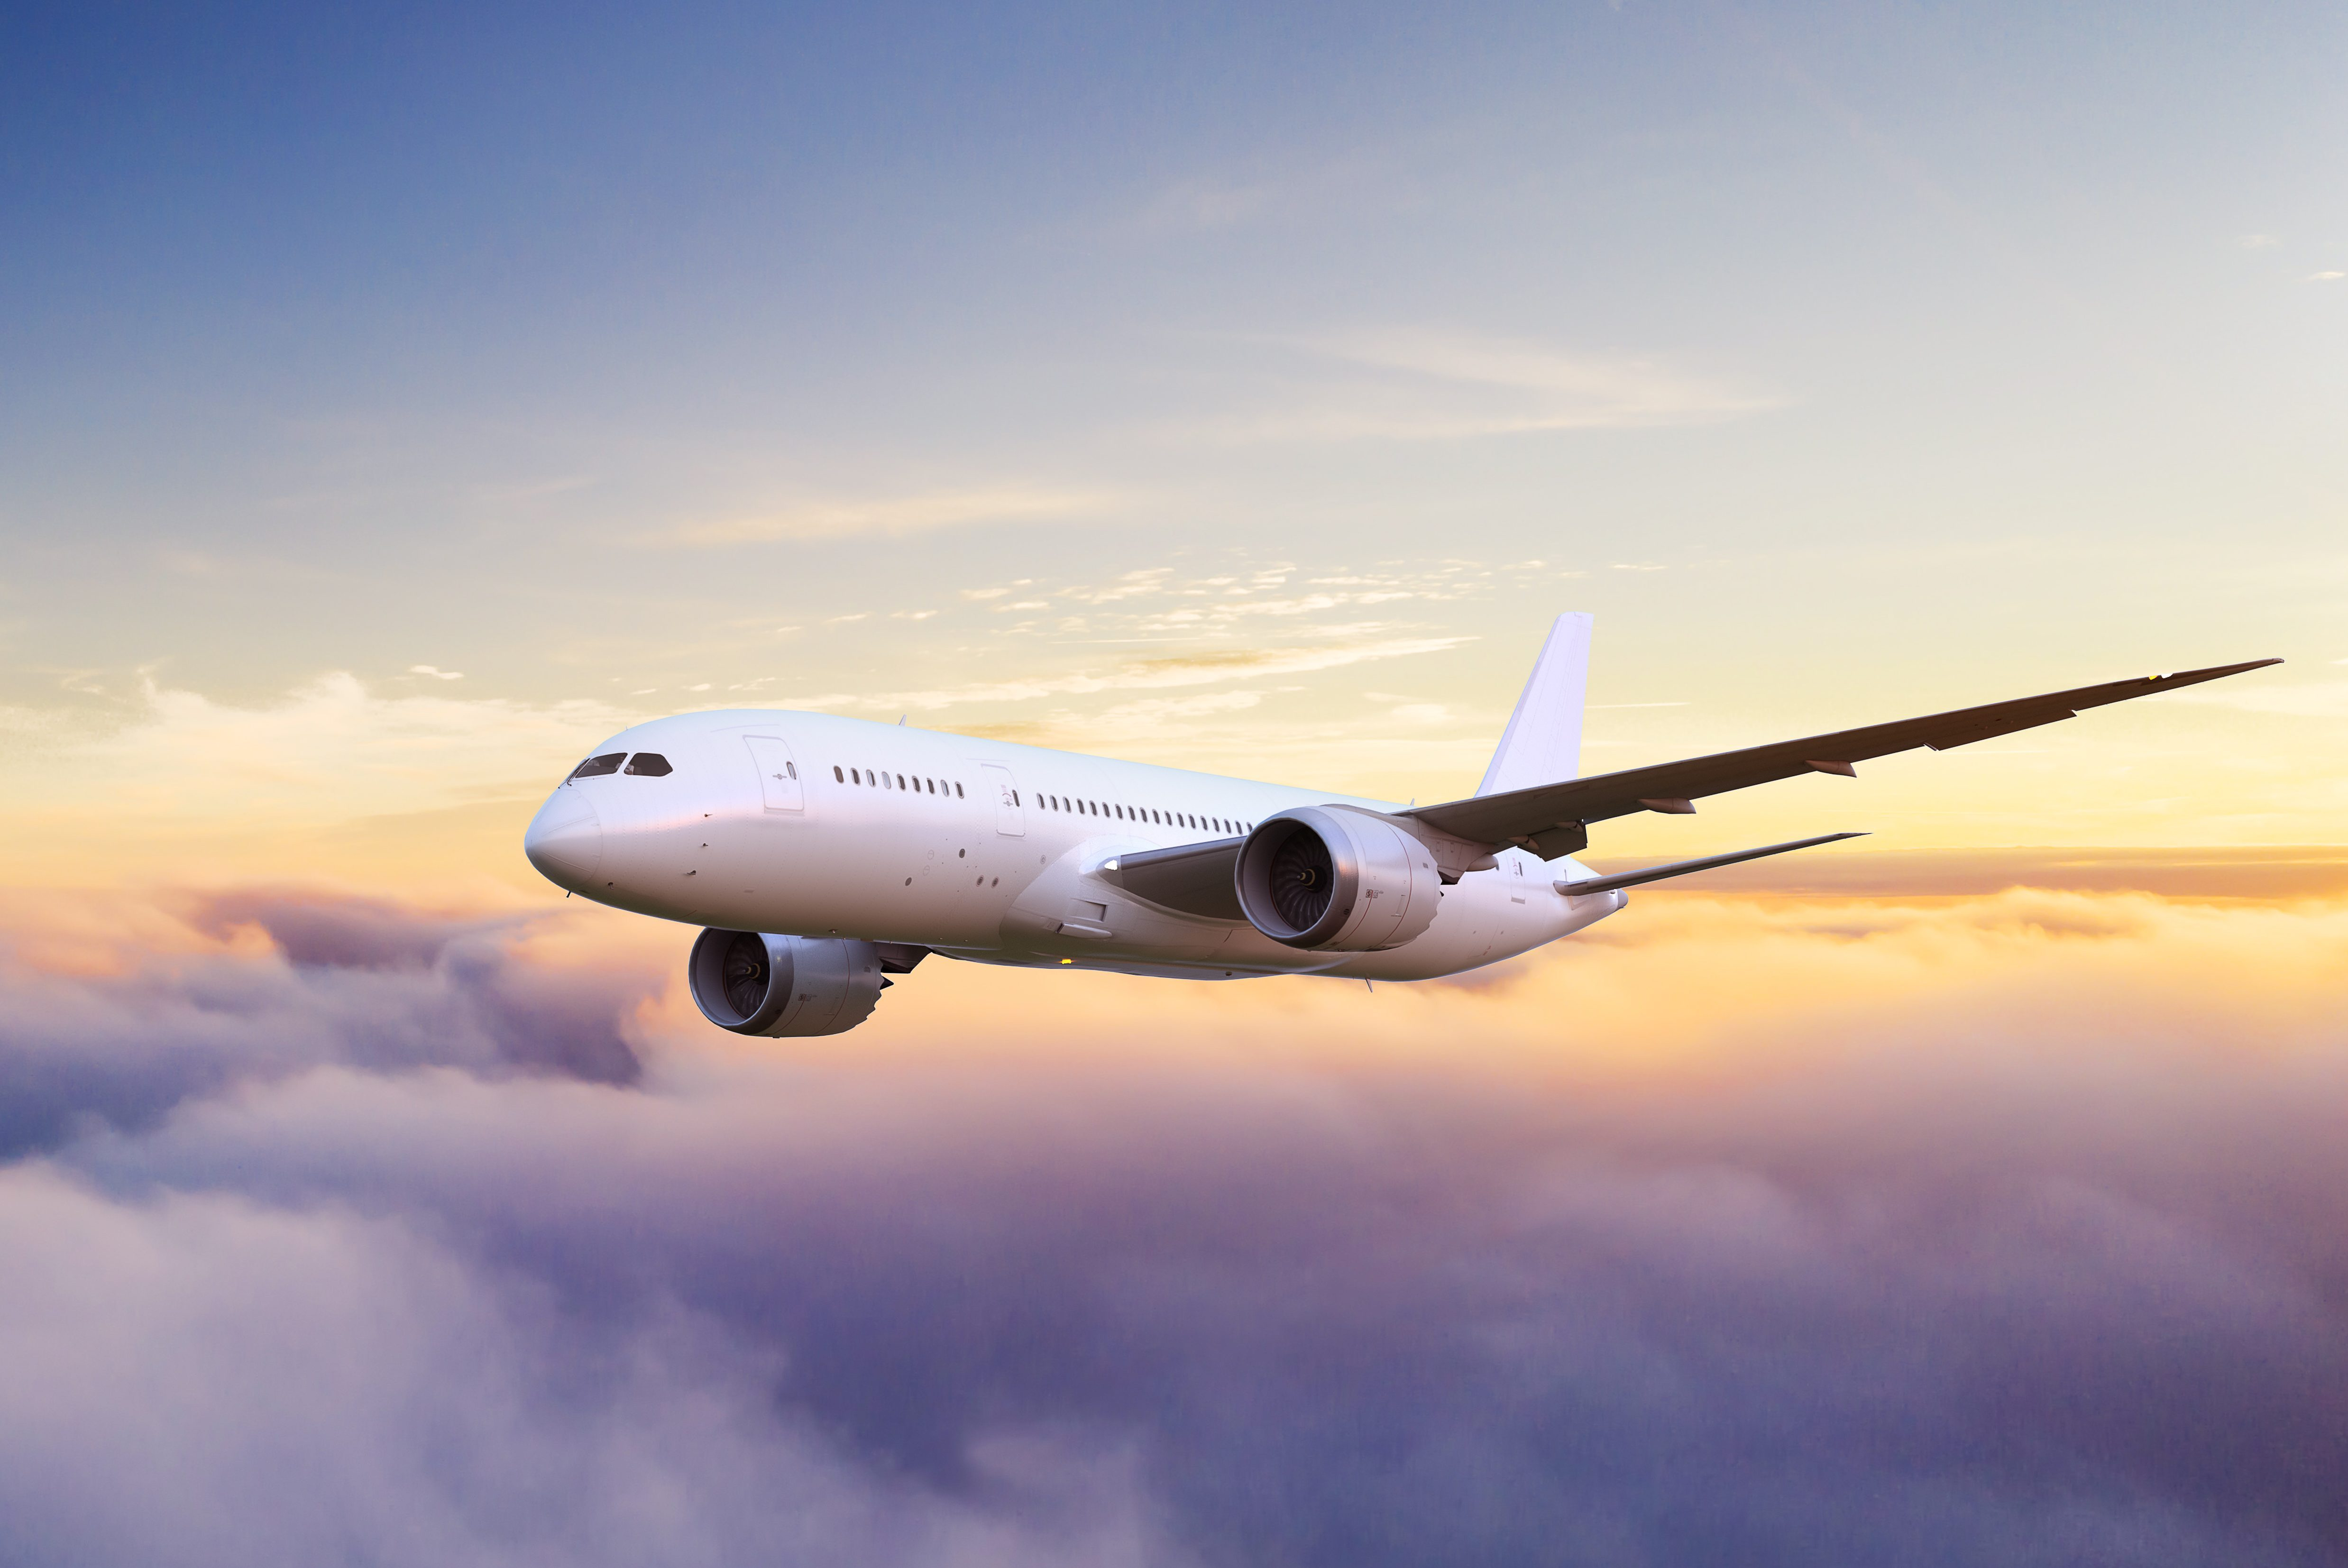

In [186]:
from PIL import Image
img = Image.open("plane.jpg")
img.transform
img.show()

In [192]:
image_path = 'plane.jpg'
classify_cifar10(image_path)
print(f'The predicted class is: {predicted_class}')

TypeError: 'dict' object is not callable